# Car Purchase Prediction Project

In this Project, we will discover and explore data from online car purchase amount from 500 customers from different countries. The goal is to find pattern in the data and create predictions based on the data resource.  

### Introducing Data
Dataset is provided by Dr. Ryan Ahmed @STEMplicity

Our goal is assist with potential car salesman and try to develop a model to predict the total dollar amount that customers are willing to pay given the following attributes:

- Customer Name
- Customer e-mail
- Country
- Gender (1-Male, 0-Female)
- Age
- Annual Salary
- Credit Card Debt
- Net Worth

The variable we are interested is:
- Car Purchase Amount 

### Step One: Data preview with Tableau

Tableau is amazing at creating easy-view and interactaive graphs.
We first import the csv data to see potential patterns we can see using regression plots on tableau

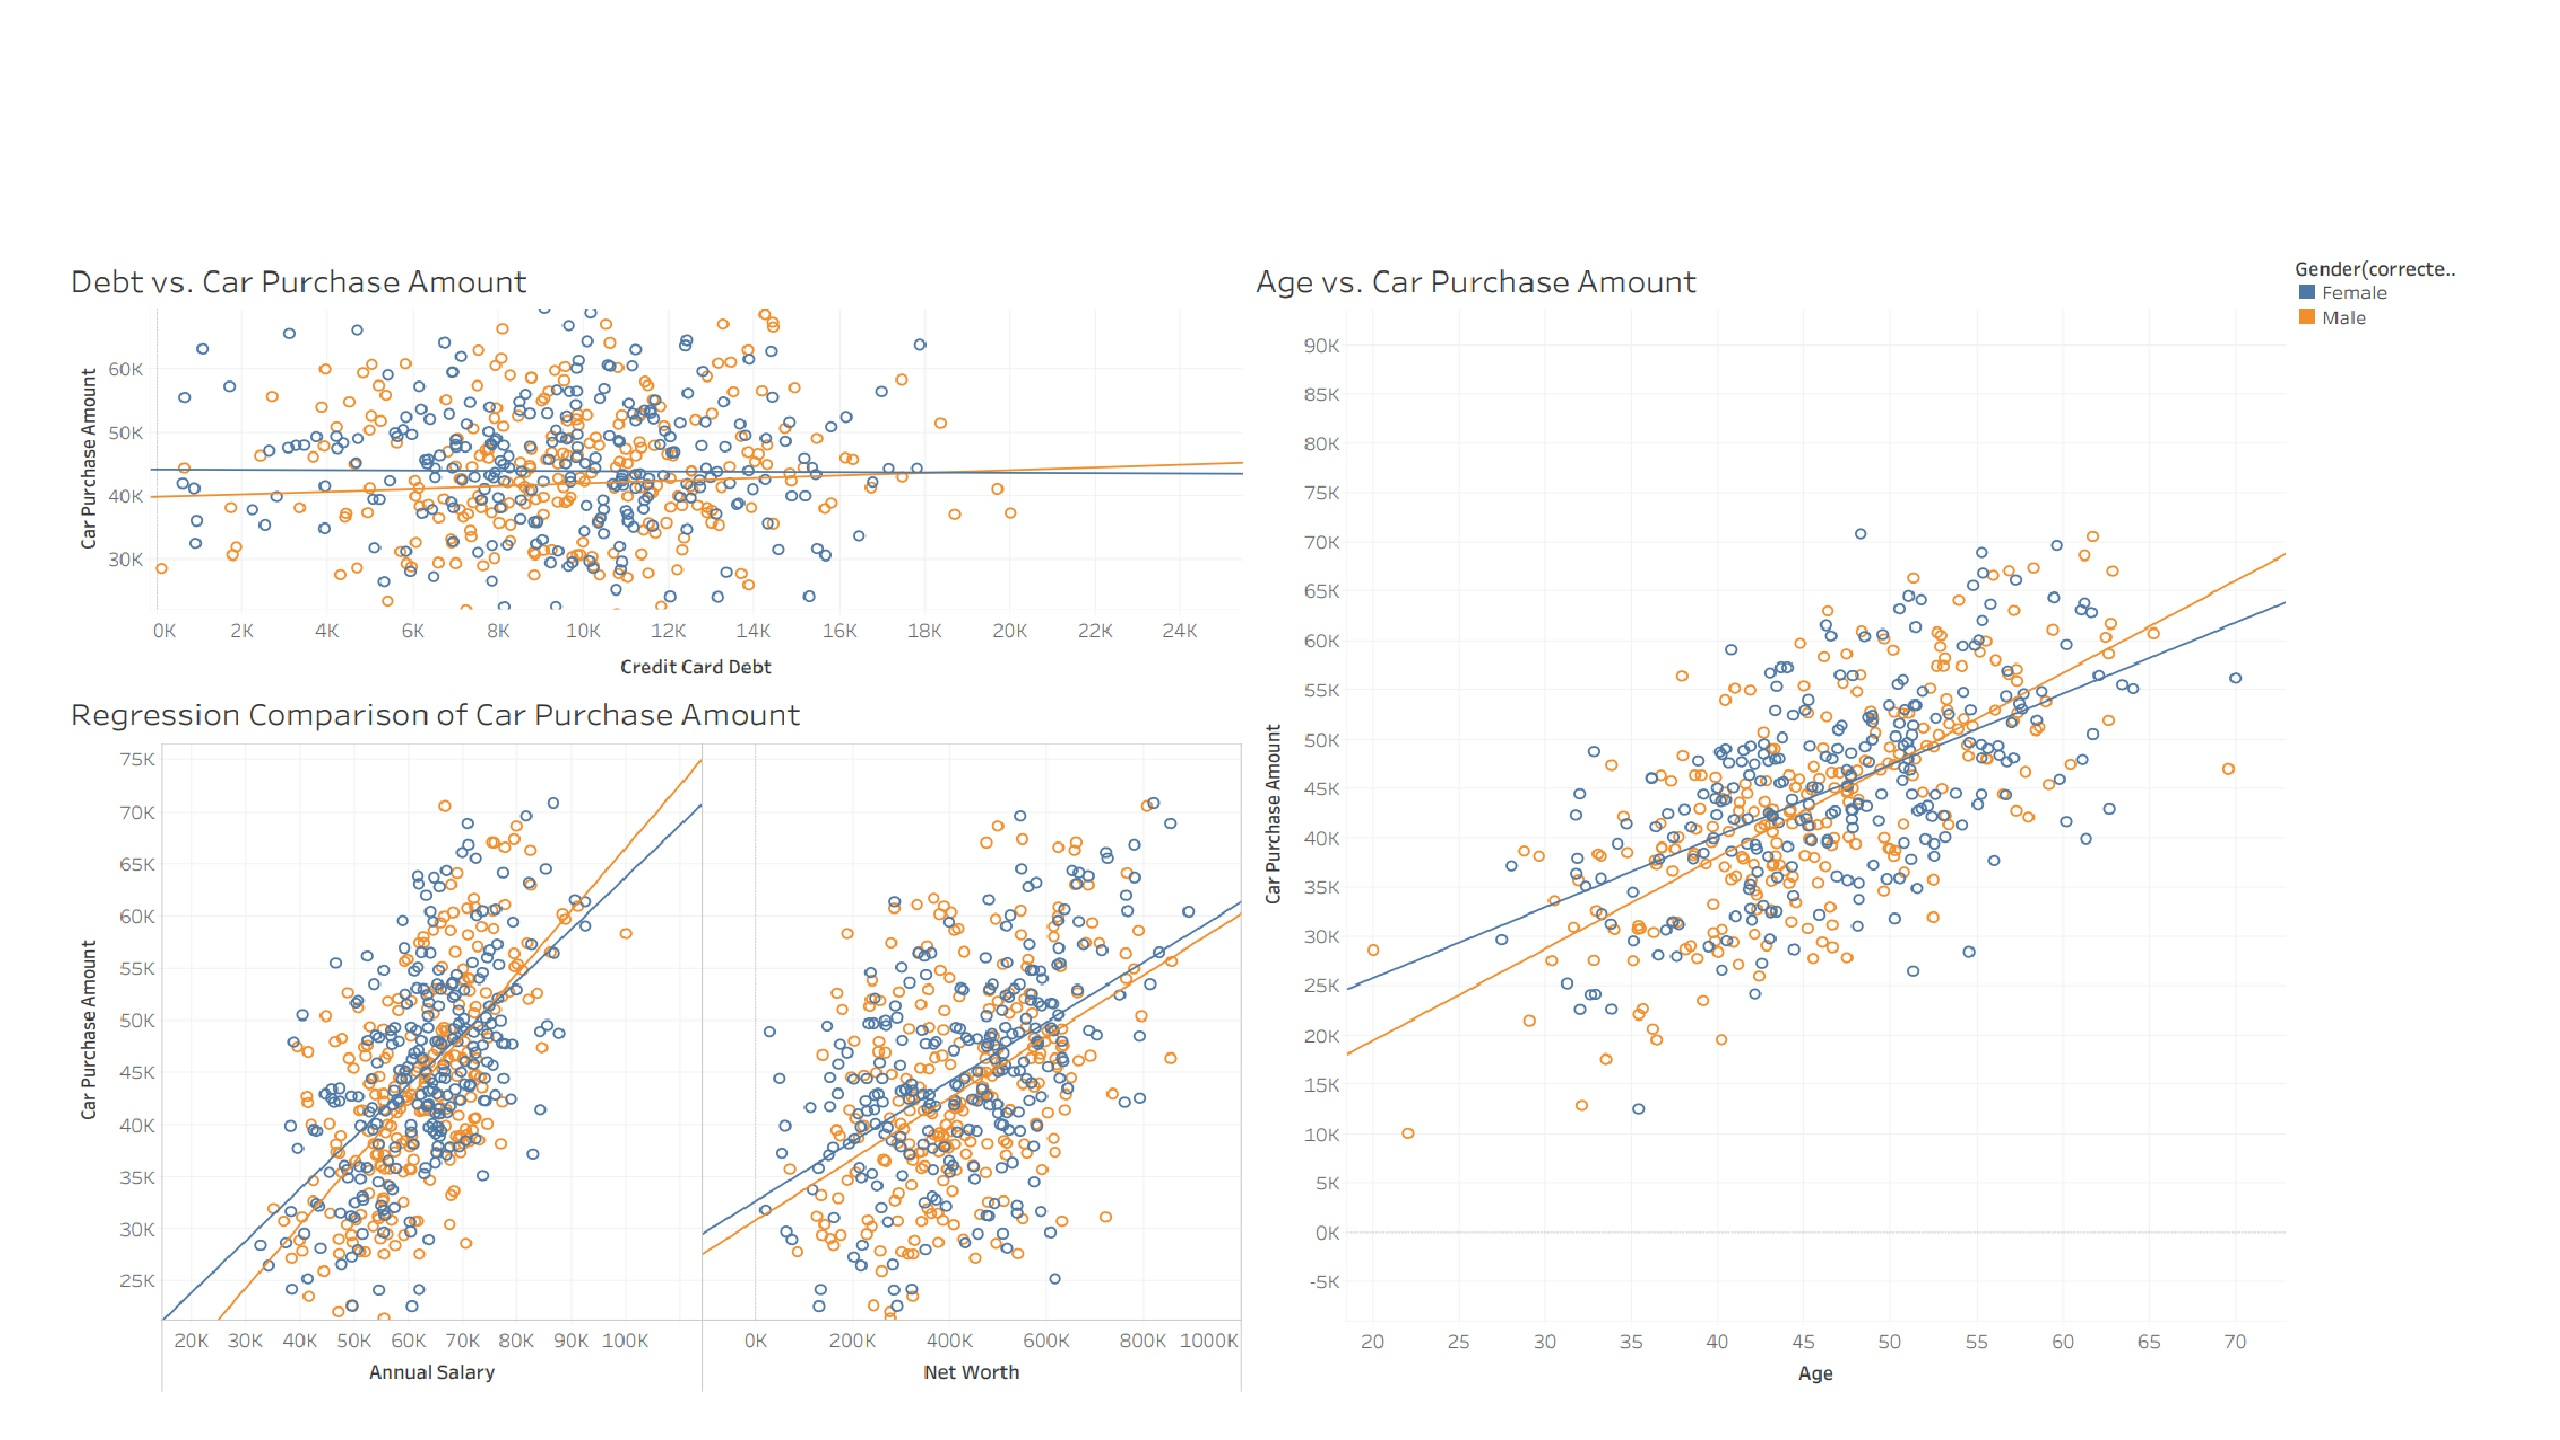

### Step Two: Data Preprocess and EDA
Using SQL Server, useful information we need from the table and can be selected and filter out unrelated info.

In [179]:
# Import SQL Server Library for sql server connection
import pyodbc 
server = 'tcp:myfirsts.database.windows.net' 
database = 'myDB' 
username = 'drmoke' 
password = 'Azureqq12355w22' 
# ENCRYPT defaults to yes starting in ODBC Driver 18.
cnxn = pyodbc.connect('DRIVER={ODBC Driver 18 for SQL Server};SERVER='+server+';DATABASE='+database+';ENCRYPT=yes;UID='+username+';PWD='+ password+';Connection Timeout=30')
cursor = cnxn.cursor()

In [2]:
# filter out customer names, emails address, and country. 
# filter out potential null values
query = 'Select Gender, Age, Annual_Salary, Credit_Card_Debt, Net_Worth, Car_Purchase_Amount INTO Car_Filtered FROM Car_Purchasing WHERE Car_Purchase_Amount IS NOT NULL'

In [3]:
count = cursor.execute(query).rowcount
cursor.commit()

ProgrammingError: ('42S01', "[42S01] [Microsoft][ODBC Driver 18 for SQL Server][SQL Server]There is already an object named 'Car_Filtered' in the database. (2714) (SQLExecDirectW)")

In [324]:
query_n = 'SELECT Gender, Age, Annual_Salary, Credit_Card_Debt, Net_Worth, Car_Purchase_Amount FROM Car_Filtered'

In [182]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [181]:
# read sql table into panda DataFrame
df = pd.DataFrame(pd.read_sql_query(query_n, cnxn))

In [183]:
df.head()

,Gender,Age,Annual_Salary,Credit_Card_Debt,Net_Worth,Car_Purchase_Amount
0,False,41.851719,62812.093750,11609.380859,238961.2500,35321.457031
1,False,40.870625,66646.890625,9572.957031,530973.9375,45115.527344
2,True,43.152897,53798.550781,11160.355469,638467.1875,42925.710938
3,True,58.271370,79370.039062,14426.165039,548599.0625,67422.359375
4,True,57.313751,59729.152344,5358.712402,560304.0625,55915.460938


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               498 non-null    bool   
 1   Age                  498 non-null    float64
 2   Annual_Salary        498 non-null    float64
 3   Credit_Card_Debt     498 non-null    float64
 4   Net_Worth            498 non-null    float64
 5   Car_Purchase_Amount  498 non-null    float64
dtypes: bool(1), float64(5)
memory usage: 20.1 KB


In [185]:
# dummy coding gender variable
df_new = pd.get_dummies(df, columns=['Gender'], drop_first = True)

In [186]:
df = df_new.rename(columns = {'Gender_True':'Gender'})

In [187]:
df.describe()

,Age,Annual_Salary,Credit_Card_Debt,Net_Worth,Car_Purchase_Amount,Gender
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,46.266345,62118.861928,9603.550905,430881.723778,44208.633775,0.506024
std,7.929079,11663.252485,3495.274490,171568.791583,10557.303574,0.500466
min,20.000000,20000.000000,100.000000,20000.000000,10092.224609,0.000000
25%,40.970407,54406.721680,7384.385742,300147.218750,37721.873047,0.000000
50%,46.049902,62915.498047,9648.837402,426750.125000,43997.783203,1.000000
75%,51.551739,70102.710938,11807.124512,557060.671875,51198.520508,1.000000
max,70.000000,100000.000000,20000.000000,891439.875000,70878.296875,1.000000


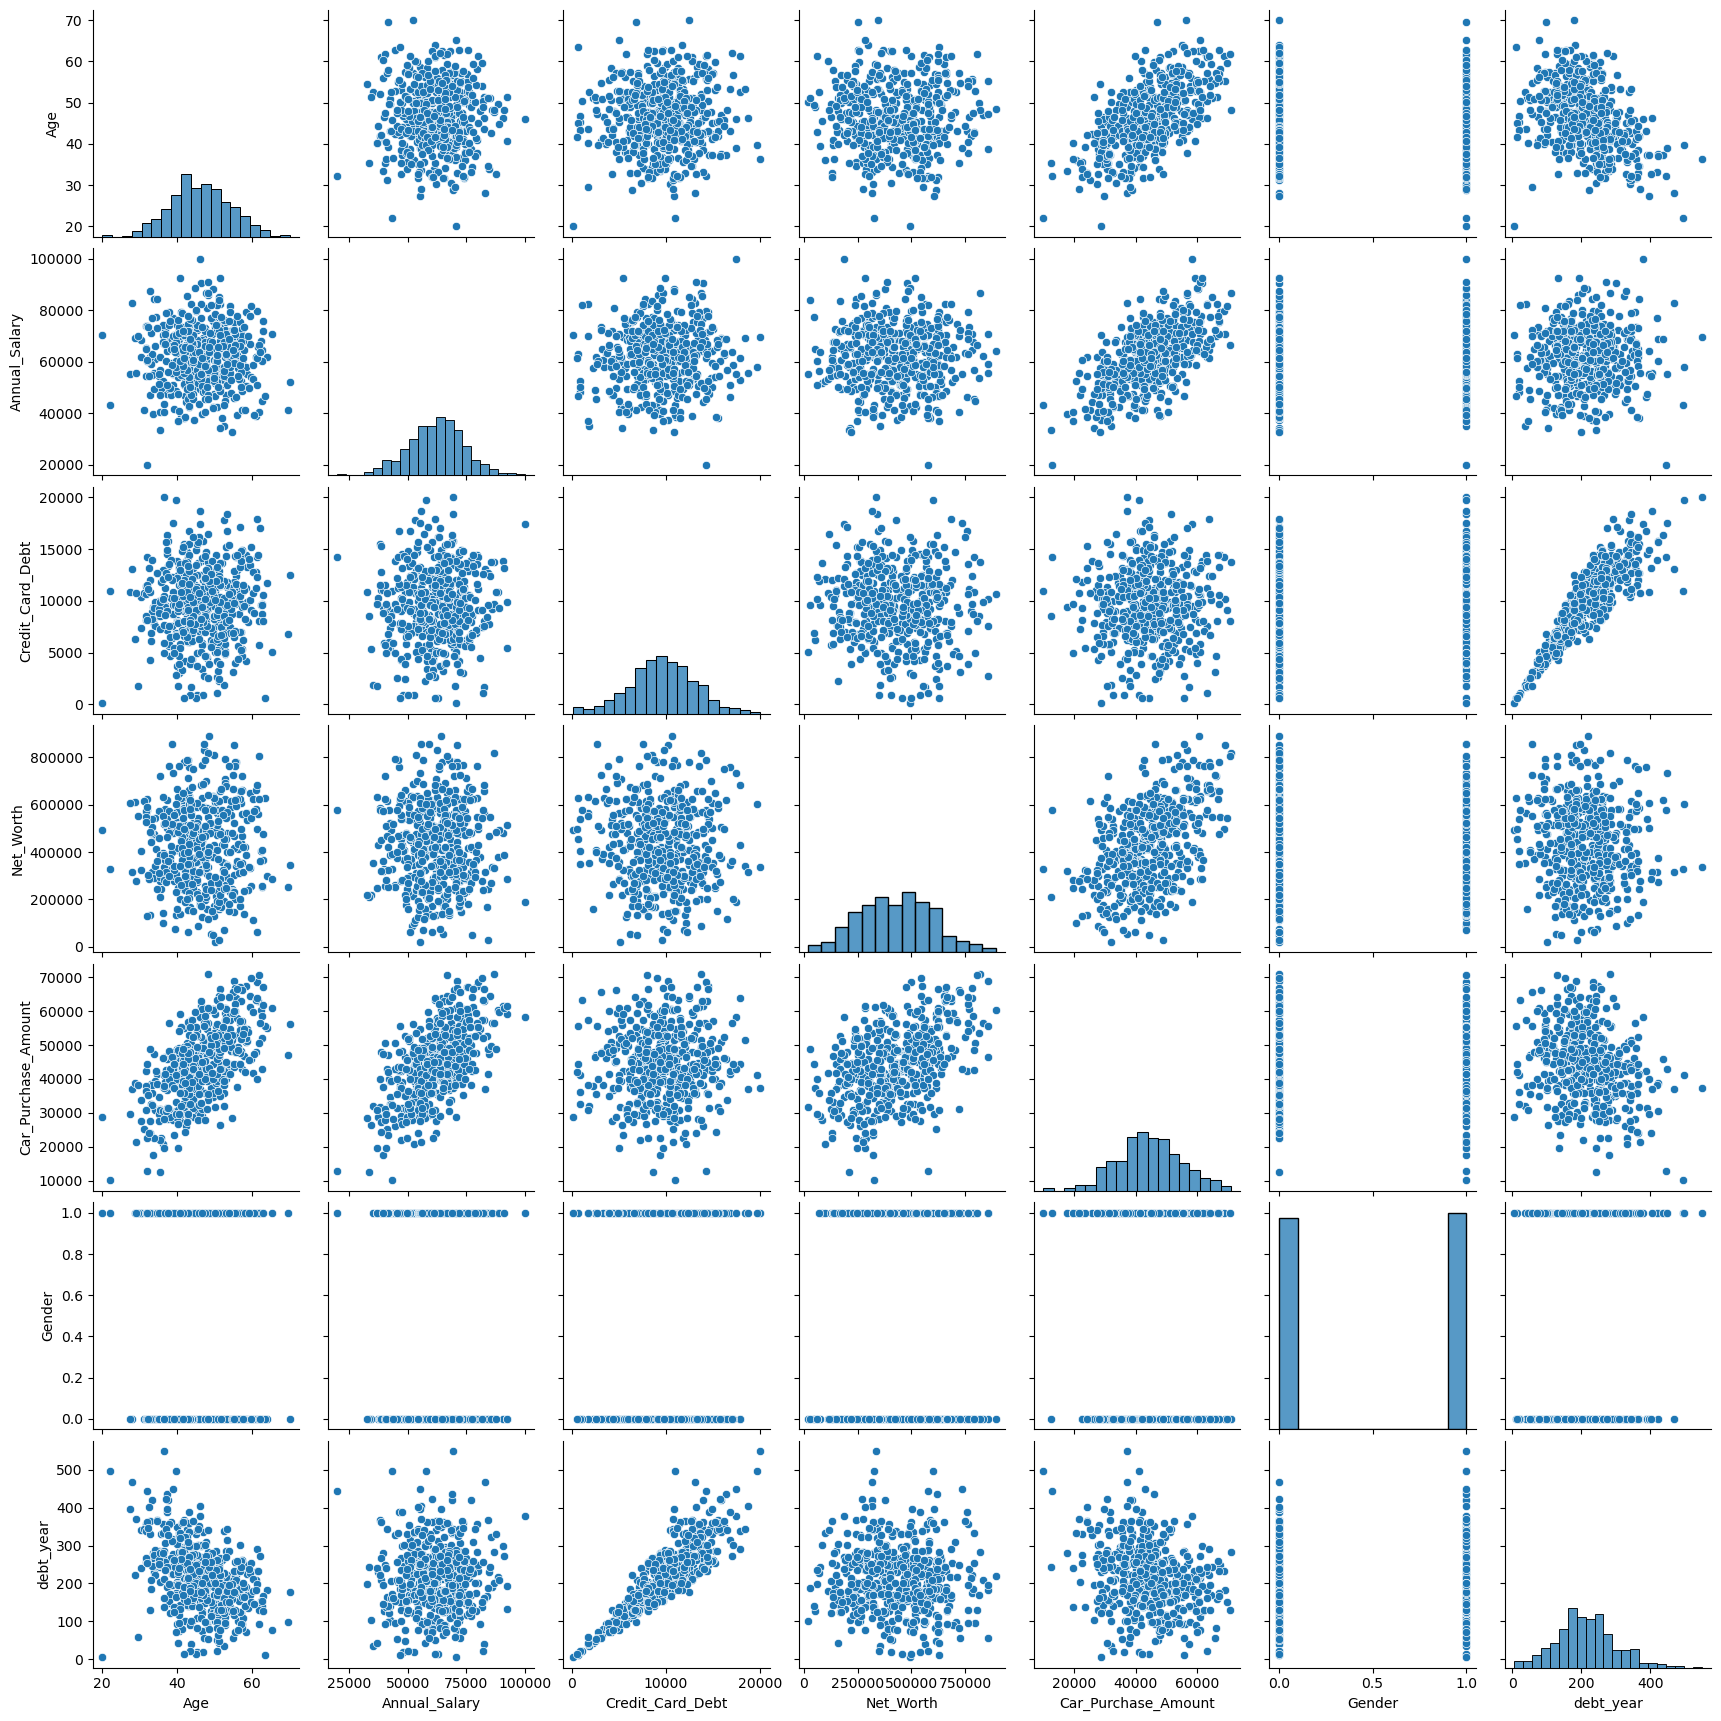

In [96]:
sns.pairplot(df)

In [188]:
X = df.drop(['Car_Purchase_Amount'], axis=1)

<AxesSubplot:>

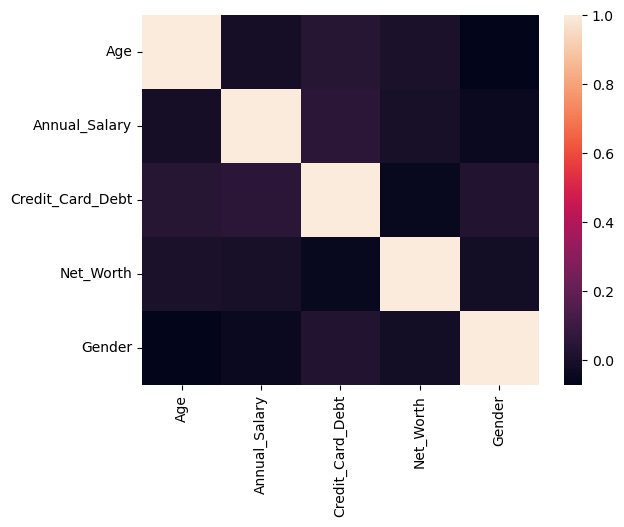

In [266]:
sns.heatmap(X.corr())

### Step Three: Train and Test Model

In [189]:
y = df['Car_Purchase_Amount']

In [190]:
# reshape into an one-dimensional array
y = y.values.reshape(-1,1)

In [191]:
# scale X and Y
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [270]:
from sklearn.model_selection import train_test_split
# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [272]:
from sklearn.preprocessing import MinMaxScaler

In [273]:
# Scale continous variable to the same domain
scaler = MinMaxScaler()

In [274]:
# Scale Features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [292]:
X_train[:5]

array([[0.37872233, 0.26315645, 0.53853697, 0.32815779, 1.        ],
       [0.60226526, 0.21084684, 0.36711227, 0.48616231, 1.        ],
       [0.55799622, 0.50804452, 0.49003465, 0.41098018, 1.        ],
       [0.77892423, 0.25901891, 0.49102529, 0.61416865, 1.        ],
       [0.41310049, 0.10971348, 0.48369597, 0.58020424, 0.        ]])

In [275]:
# Create validation set using the training samples
X_train_s, X_val, y_train_s, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state= 101)

To find hyperparameter that's best fit for our model, we import RandomSearch to help us for hyperparameter tuning

In [294]:
import tensorflow.keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Input
from keras import regularizers
from keras_tuner import RandomSearch, Objective
from keras.optimizers import Adam
from keras.metrics import MeanSquaredError

In [239]:
tensorflow.keras.backend.clear_session()

In [276]:
# Build Neural Network Models with hyperparameters
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(5,)))
#    Create For Loops to find best setting for each layer in the NN
    for i in range(hp.Int('layers', 2, 6)):
        model.add(Dense(units=hp.Int('units_' + str(i), 10, 100, step=10), activation=hp.Choice('act_' + str(i), ['relu', 'sigmoid'])))
    if hp.Boolean("dropout"):
        model.add(Dropout(rate=0.25))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-3,1e-6])), loss='mse', metrics=[MeanSquaredError()])
    return model

In [277]:
tuner = RandomSearch(build_model, objective=Objective('val_loss', direction="min"), overwrite=True, max_trials=10, directory='my_dir1', project_name='Car_Purchase_Predict')

In [278]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 10, 'sampling': None}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 10, 'sampling': None}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 1e-06], 'ordered': True}


In [279]:
# Using Random Search for hyperparameter tuning
tuner.search(X_train_s, y_train_s, epochs=10, validation_data=(X_val, y_val))

Trial 10 Complete [00h 00m 01s]
val_loss: 2125346560.0

Best val_loss So Far: 2099711616.0
Total elapsed time: 00h 00m 12s
INFO:tensorflow:Oracle triggered exit


In [280]:
tuner.results_summary()

Results summary
Results in my_dir1\Car_Purchase_Predict
Showing 10 best trials
Trial summary
Hyperparameters:
layers: 4
units_0: 40
act_0: relu
units_1: 20
act_1: relu
dropout: False
learning_rate: 0.001
units_2: 100
act_2: relu
units_3: 40
act_3: relu
units_4: 20
act_4: relu
Score: 2099711616.0
Trial summary
Hyperparameters:
layers: 5
units_0: 70
act_0: sigmoid
units_1: 70
act_1: sigmoid
dropout: False
learning_rate: 0.001
units_2: 90
act_2: relu
units_3: 60
act_3: relu
units_4: 50
act_4: sigmoid
Score: 2125300096.0
Trial summary
Hyperparameters:
layers: 4
units_0: 90
act_0: sigmoid
units_1: 90
act_1: sigmoid
dropout: True
learning_rate: 0.001
units_2: 20
act_2: sigmoid
units_3: 50
act_3: sigmoid
units_4: 40
act_4: sigmoid
Score: 2125346560.0
Trial summary
Hyperparameters:
layers: 5
units_0: 40
act_0: relu
units_1: 20
act_1: sigmoid
dropout: False
learning_rate: 0.001
units_2: 80
act_2: relu
units_3: 10
act_3: sigmoid
units_4: 10
act_4: relu
Score: 2125850880.0
Trial summary
Hyperpara

In [281]:
# Retrieve the best model from Random Search
models = tuner.get_best_models(num_models=2)
best_model = models[0]

In [282]:
best_model.build(input_shape=(5,))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                240       
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 100)               2100      
                                                                 
 dense_3 (Dense)             (None, 40)                4040      
                                                                 
 dense_4 (Dense)             (None, 1)                 41        
                                                                 
Total params: 7,241
Trainable params: 7,241
Non-trainable params: 0
_________________________________________________________________


In [247]:
# Create EarlyStopping value for the model
callback = tensorflow.keras.callbacks.EarlyStopping('val_loss', patience=10)

In [283]:
epochs_hist = best_model.fit(X_train, y_train, epochs=200, callbacks=[callback], batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/200
10/10 [==============================] - 0s 11ms/step - loss: 2017946368.0000 - mean_squared_error: 2017946368.0000 - val_loss: 2130944768.0000 - val_mean_squared_error: 2130944768.0000
Epoch 2/200
10/10 [==============================] - 0s 3ms/step - loss: 1993983744.0000 - mean_squared_error: 1993983744.0000 - val_loss: 2099491200.0000 - val_mean_squared_error: 2099491200.0000
Epoch 3/200
10/10 [==============================] - 0s 3ms/step - loss: 1956929536.0000 - mean_squared_error: 1956929536.0000 - val_loss: 2051382528.0000 - val_mean_squared_error: 2051382528.0000
Epoch 4/200
10/10 [==============================] - 0s 3ms/step - loss: 1901176064.0000 - mean_squared_error: 1901176064.0000 - val_loss: 1980854528.0000 - val_mean_squared_error: 1980854528.0000
Epoch 5/200
10/10 [==============================] - 0s 3ms/step - loss: 1821980928.0000 - mean_squared_error: 1821980928.0000 - val_loss: 1881122176.0000 - val_mean_squared_error: 1881122176.0000
Epoch 6/200
10

Epoch 44/200
10/10 [==============================] - 0s 3ms/step - loss: 48987392.0000 - mean_squared_error: 48987392.0000 - val_loss: 50067464.0000 - val_mean_squared_error: 50067464.0000
Epoch 45/200
10/10 [==============================] - 0s 3ms/step - loss: 47984892.0000 - mean_squared_error: 47984892.0000 - val_loss: 49209732.0000 - val_mean_squared_error: 49209732.0000
Epoch 46/200
10/10 [==============================] - 0s 3ms/step - loss: 46860076.0000 - mean_squared_error: 46860076.0000 - val_loss: 48124540.0000 - val_mean_squared_error: 48124540.0000
Epoch 47/200
10/10 [==============================] - 0s 3ms/step - loss: 45907296.0000 - mean_squared_error: 45907296.0000 - val_loss: 47140872.0000 - val_mean_squared_error: 47140872.0000
Epoch 48/200
10/10 [==============================] - 0s 3ms/step - loss: 44851980.0000 - mean_squared_error: 44851980.0000 - val_loss: 46083364.0000 - val_mean_squared_error: 46083364.0000
Epoch 49/200
10/10 [==============================

10/10 [==============================] - 0s 3ms/step - loss: 21664794.0000 - mean_squared_error: 21664794.0000 - val_loss: 24255806.0000 - val_mean_squared_error: 24255806.0000
Epoch 88/200
10/10 [==============================] - 0s 3ms/step - loss: 21335770.0000 - mean_squared_error: 21335770.0000 - val_loss: 24061388.0000 - val_mean_squared_error: 24061388.0000
Epoch 89/200
10/10 [==============================] - 0s 3ms/step - loss: 20957452.0000 - mean_squared_error: 20957452.0000 - val_loss: 23683412.0000 - val_mean_squared_error: 23683412.0000
Epoch 90/200
10/10 [==============================] - 0s 3ms/step - loss: 20643588.0000 - mean_squared_error: 20643588.0000 - val_loss: 23404356.0000 - val_mean_squared_error: 23404356.0000
Epoch 91/200
10/10 [==============================] - 0s 3ms/step - loss: 20284868.0000 - mean_squared_error: 20284868.0000 - val_loss: 22996764.0000 - val_mean_squared_error: 22996764.0000
Epoch 92/200
10/10 [==============================] - 0s 3ms/st

10/10 [==============================] - 0s 3ms/step - loss: 10474510.0000 - mean_squared_error: 10474510.0000 - val_loss: 12605526.0000 - val_mean_squared_error: 12605526.0000
Epoch 131/200
10/10 [==============================] - 0s 3ms/step - loss: 10279386.0000 - mean_squared_error: 10279386.0000 - val_loss: 12405235.0000 - val_mean_squared_error: 12405235.0000
Epoch 132/200
10/10 [==============================] - 0s 3ms/step - loss: 10074922.0000 - mean_squared_error: 10074922.0000 - val_loss: 12198187.0000 - val_mean_squared_error: 12198187.0000
Epoch 133/200
10/10 [==============================] - 0s 3ms/step - loss: 9932813.0000 - mean_squared_error: 9932813.0000 - val_loss: 12085149.0000 - val_mean_squared_error: 12085149.0000
Epoch 134/200
10/10 [==============================] - 0s 3ms/step - loss: 9692019.0000 - mean_squared_error: 9692019.0000 - val_loss: 11703717.0000 - val_mean_squared_error: 11703717.0000
Epoch 135/200
10/10 [==============================] - 0s 3ms/s

Epoch 174/200
10/10 [==============================] - 0s 3ms/step - loss: 4157470.5000 - mean_squared_error: 4157470.5000 - val_loss: 5182187.0000 - val_mean_squared_error: 5182187.0000
Epoch 175/200
10/10 [==============================] - 0s 3ms/step - loss: 4085532.5000 - mean_squared_error: 4085532.5000 - val_loss: 5113401.5000 - val_mean_squared_error: 5113401.5000
Epoch 176/200
10/10 [==============================] - 0s 3ms/step - loss: 3973272.2500 - mean_squared_error: 3973272.2500 - val_loss: 4985246.5000 - val_mean_squared_error: 4985246.5000
Epoch 177/200
10/10 [==============================] - 0s 3ms/step - loss: 3888864.5000 - mean_squared_error: 3888864.5000 - val_loss: 4885107.0000 - val_mean_squared_error: 4885107.0000
Epoch 178/200
10/10 [==============================] - 0s 3ms/step - loss: 3802723.0000 - mean_squared_error: 3802723.0000 - val_loss: 4799637.0000 - val_mean_squared_error: 4799637.0000
Epoch 179/200
10/10 [==============================] - 0s 3ms/ste

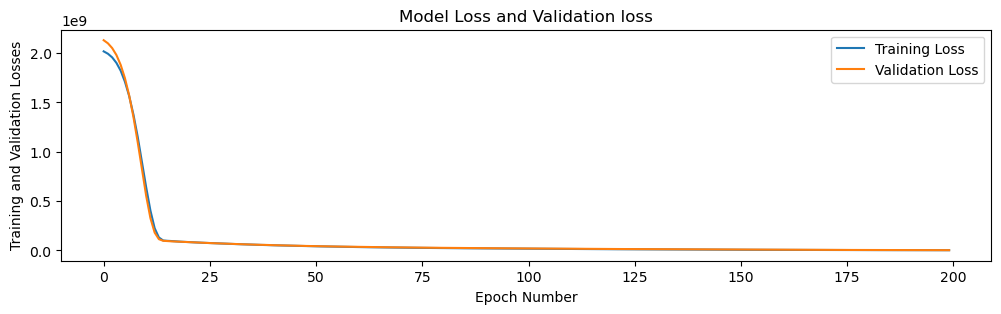

In [284]:
plt.figure(figsize=(12,3))
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss and Validation loss')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [306]:
from tensorflow.keras.models import load_model

In [289]:
best_model.save('best_NN.h5')

In [307]:
predictions = best_model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


In [287]:
predictions.shape

(100, 1)

In [308]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [310]:
score = r2_score(y_test, predictions)
mse_score = mean_squared_error(y_test, predictions)
print("The Mean Squared Error of our Model is {}".format(round(mse_score, 2)))
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The Mean Squared Error of our Model is 2086013.56
The accuracy of our model is 98.0%
